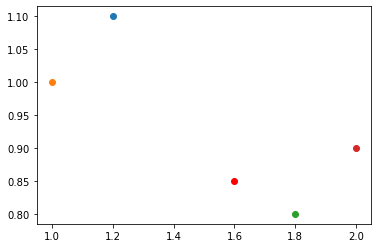

In [2]:
import numpy as np # 다차원배열, 선형대수 연산 
import matplotlib.pyplot as plt

# 1. 알려진 두 집단 x,y 산점도 시각화 
plt.scatter(1.2, 1.1) # A 집단
plt.scatter(1.0, 1.0)
plt.scatter(1.8, 0.8) # B 집단 
plt.scatter(2, 0.9)

# K=3 홀수로 한다 가장 가까운 탑 3를 찾아줌

plt.scatter(1.6, 0.85, color='r') # 분류대상 
plt.show()

In [3]:
# 2. DATA 생성과 함수 정의 
p1 = [1.2, 1.1] # A 집단 
p2 = [1.0, 1.0]           # 알려진 그룹
p3 = [1.8, 0.8] # B 집단
p4 = [2, 0.9]
category = ['A','A','B','B'] # 알려진 집단 분류범주(Y변수) 지도학습에 이용됨
p5 = [1.6, 0.85] # 분류대상    알려지지 않음 그룹

"""
# 선형대수 연산이 불가능
sub = p1-p2
print(sub)  #TypeError: unsupported operand type(s) for -: 'list' and 'list'
"""

"\n# 선형대수 연산이 불가능\nsub = p1-p2\nprint(sub)  #TypeError: unsupported operand type(s) for -: 'list' and 'list'\n"

In [4]:
# data 생성 함수 정의
def data_set():
    # 선형대수 연산 : numpy형 변환 
    know_group = np.array([p1, p2, p3, p4]) # 알려진 집단   4행 2열 구조가 만들어짐
    not_know_group = np.array(p5) # 알려지지 않은 집단
    class_category = np.array(category) # 정답(분류범주) 
    return know_group,not_know_group,class_category 

In [5]:
# 1. data 생성 
k_group,nk_group, cat =data_set()
print(k_group)
k_group.shape  #(4, 2) 2차원 데이터 4개의 벡터에 의햐 만들어짐
print(nk_group)
nk_group.shape #(2,) 1차원 데이터
print(cat)  # 알려진 그룹
# 2차원 1차원 연산이 가능: 브로드캐스팅

[[1.2 1.1]
 [1.  1. ]
 [1.8 0.8]
 [2.  0.9]]
[1.6  0.85]
['A' 'A' 'B' 'B']


In [6]:
# 2. 유클리드안 거리 계산식 : 차(-) -> 제곱(**) -> 합(sum) -> 제곱근(sqrt)
diff = k_group-nk_group # 차(-)
print(diff)

[[-0.4   0.25]
 [-0.6   0.15]
 [ 0.2  -0.05]
 [ 0.4   0.05]]


In [7]:
square_diff = diff**2 # 제곱(**)
print(square_diff)

[[0.16   0.0625]
 [0.36   0.0225]
 [0.04   0.0025]
 [0.16   0.0025]]


In [8]:
sum_square_diff = square_diff.sum(axis = 1)  # 행단위로 합계를 구한다
print(sum_square_diff)

[0.2225 0.3825 0.0425 0.1625]


In [9]:
distance = np.sqrt(sum_square_diff)  # 유클리드안 거리 계산
print(distance)
# [0.47169906 0.61846584 0.20615528 0.40311289] 수치가 작은게 가장 가까운것
#  A            A            B         B     =>   B에 가장 가까움
# K  = 3 타 쓰리는 A A B  수치가 작은 순으로 

[0.47169906 0.61846584 0.20615528 0.40311289]


In [10]:
# 3. 오름 정렬 = > index반환
sort_idx = distance.argsort() # 결과중 가장 작은순으로 인덱스 제공
print(sort_idx) # [2 3 0 1] 결과중 값이 작은순으로 반환

[2 3 0 1]


In [11]:
result = cat[sort_idx]
print(result)  # ['B' 'B' 'A' 'A']  



['B' 'B' 'A' 'A']


In [12]:
k3=result[:3]
print(k3)   #['B' 'B' 'A'] k를 3으로 잡으면 3개 1이면 1개만 

['B' 'B' 'A']


In [17]:
def classfier(know, not_know, cat, k=3):
    # 1. 유클리드안 거리 계산식
    diff = k_group-nk_group
    square_diff = diff**2
    sum_square_diff = square_diff.sum(axis = 1) 
    distance = np.sqrt(sum_square_diff)  
    # 2. 오름 차순
    sort_idx = distance.argsort()
    #3. 최근접 이웃(k=3)
    class_result = {} # 빈 set - > {B:2,A:1}
    for i in range(k):  # 0,1,2 3회 반복
        key = cat[sort_idx[i]] # ['B' 'B' 'A' 'A'] 
        class_result[key] = class_result.get(key,0)+1
        
    return class_result

# 함수 호출
classfier(k_group,nk_group, cat)
print(result) #{'B': 2, 'A': 1}

['B' 'B' 'A' 'A']


In [19]:
vote_result = max(result)
print("분류결과:",vote_result) # 분류 결과:B

분류결과: B
